In [40]:
import os

import matplotlib.pyplot as plt # visualization
import numpy as np # linear algebra
import pandas as pd # data processing
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


# Домашнаяя работа: работа с numpy, pandas и matplotlib

В этой домашней работе вам предстоит выполнить EDA (Exploratory Data Analysis) датасета с данными о футболистах FIFA.

Требования к выполнению домашней работы:
- Во всех графиках должны быть подписи через `title`, `legend`, etc.
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново. Если не видно - напишите в общий чатик, вам помогут либо преподаватели, либо те, кто уже столкнулся с этой проблемой
- Можно баловаться с цветами, но в меру. Если в итоге работа станет нечитаемой, то задание не будет засчитано
- Если вы сдаете работу в Google Colaboratory, убедитесь, что ваша тетрадка доступна по ссылке. Если в итоге по каким-то причинам тетрадка не будет открываться у преподавателя, задание не будет засчитано

In [41]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [43]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [44]:
df[['Wage']].head(10)

,Wage
0,€565K
1,€405K
2,€290K
3,€260K
4,€355K
5,€340K
6,€420K
7,€455K
8,€380K
9,€94K


# Работа с датафреймом

Заполните пропуски:

1. В датасете `88` переменных 
2. Из них числовых `43`

# Работа с графикой

3. Изучите распределение возрастов с помощью колонки Age [px.histogram](https://plotly.com/python/histograms/)
4. Изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

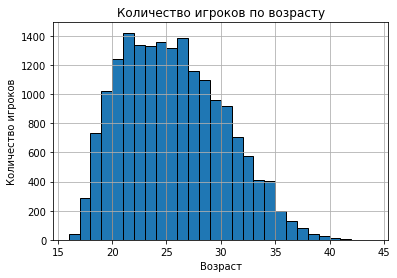

In [48]:
b=np.array(df['Age'])

plt.xlabel('Возраст')
plt.ylabel('Количество игроков')
plt.title('Количество игроков по возрасту')
plt.grid(True)
plt.hist(b,bins=np.arange(np.min(b),np.max(b)),edgecolor="black")
plt.show()



5. Найдите колонку, показывающую, является ли футболист левой или правшой
6. Визуализируйте соотношенеие между левшами и правшами (считаем, что признак "левша"/"правша" определяет предпочтительную ногу для ударов

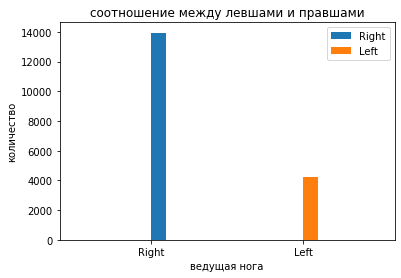

In [46]:
b=np.array(df['Preferred Foot'])
plt.ylabel('количество')
plt.xlabel('ведущая нога')
plt.title('соотношение между левшами и правшами')
plt.hist((b[b=='Right']),label='Right')
plt.hist((b[b=='Left']),label='Left')
plt.legend()
plt.show()

7. Визуализируйте Международный Рейтинг футболистов (International Reputation)
8. Ассоциирован ли он с национальностью? С футбольным клубом? 

![Игроки](Players.png "Title")

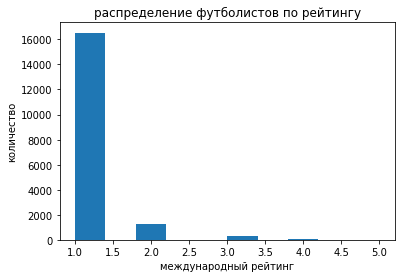

In [49]:
ir=np.array(df['International Reputation'])

plt.hist(ir)
plt.ylabel('количество')
plt.xlabel('международный рейтинг')
plt.title('распределение футболистов по рейтингу')
plt.show()




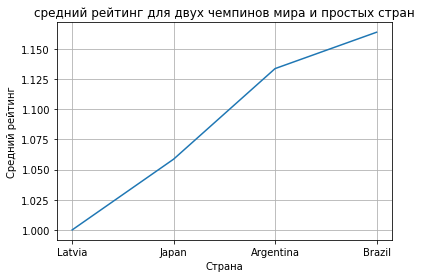

In [50]:

nt=np.array(df['Nationality'])
rations=pd.Series(ir,index=nt)
ltv=np.array(rations['Latvia'])
ltv = ltv[~np.isnan(ltv)]
jpn=np.array(rations['Japan'])
jpn = jpn[~np.isnan(jpn)]
arg=np.array(rations['Argentina'])
arg = arg[~np.isnan(arg)]
brz=np.array(rations['Brazil'])
brz = brz[~np.isnan(brz)]
avg=[np.mean(ltv),np.mean(jpn),np.mean(arg),np.mean(brz)]
nts=['Latvia','Japan','Argentina','Brazil']

plt.plot(nts,avg)
plt.title('средний рейтинг для двух чемпинов мира и простых стран')
plt.xlabel('Страна')
plt.ylabel('Средний рейтинг')
plt.grid(True)

plt.show()

по графику 'средний рейтинг для двух чемпинов мира и простых стран' можно сделать вывод что рейтинг зависит от национальности 

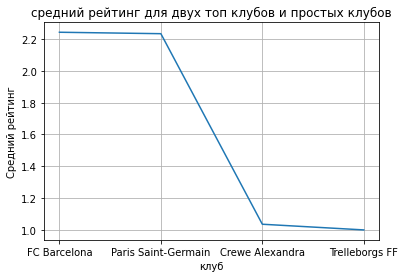

In [51]:
club=np.array(df['Club'])
rations=pd.Series(ir,index=club)

brc=np.array(rations['FC Barcelona'])
brc = brc[~np.isnan(brc)]
psg=np.array(rations['Paris Saint-Germain'])
psg = psg[~np.isnan(psg)]
ca=np.array(rations['Crewe Alexandra'])
ca = ca[~np.isnan(ca)]
tf=np.array(rations['Trelleborgs FF'])
tf = tf[~np.isnan(tf)]
avg=[np.mean(brc),np.mean(psg),np.mean(ca),np.mean(tf)]
clb=['FC Barcelona','Paris Saint-Germain','Crewe Alexandra','Trelleborgs FF']

plt.plot(clb,avg)
plt.title('средний рейтинг для двух топ клубов и простых клубов')
plt.xlabel('клуб')
plt.ylabel('Средний рейтинг')
plt.grid(True)

plt.show()

по графику 'средний рейтинг для двух топ клубов и простых клубов' можно сделать вывод что рейтинг зависит от клуба

9. Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её
10. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

![Коазуация или корреляция?](causuation.png "???")

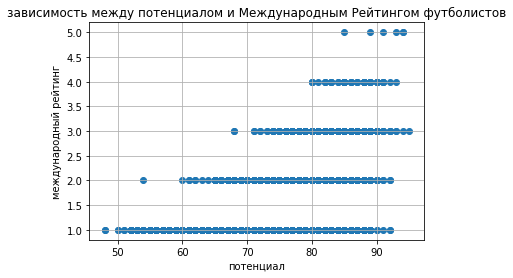

In [52]:
pt=np.array(df['Potential'])
ir=np.array(df['International Reputation'])
plt.xlabel('потенциал')
plt.ylabel('международный рейтинг')
plt.title('зависимость между потенциалом и Международным Рейтингом футболистов')
plt.grid(True)
plt.scatter(pt, ir)
plt.show()

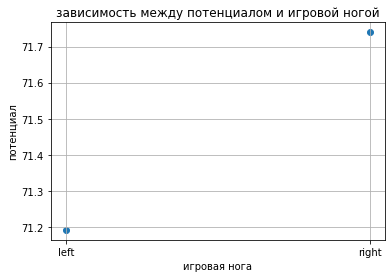

In [53]:
pt=np.array(df['Potential'])
pf=np.array(df['Preferred Foot'])
plt.xlabel('игровая нога')
plt.ylabel('потенциал')
plt.title('зависимость между потенциалом и игровой ногой')
plt.grid(True)
ss=pd.Series(pt,index=pf)
avg=[]
x=np.array(ss['Right'])
avg.append(x.mean())
x=np.array(ss['Left'])
avg.append(x.mean())
plt.scatter(['left','right'], avg)
plt.show()

1)зависимость между потенциалом и Международным Рейтингом футболистов очевидно видна из графика , чем выше потенциал тем более высокий рейтинг имеет игрок.
2)по графику 'зависимость между потенциалом и игровой ногой' можно увидеть, что разница в среднем значении потенциала не превышает даже 1 , из чего можно сделать вывод , что ведущая нога не влияет на потенциал/влияет незначительно

Теперь пройдёмся по показателям игроков...

11. Есть ли зависимость между **выносливостью** игрока (Stamina) и его **силой** (Strength)? Какая? Точно ли это зависимость? 


[72. 88. 81. 43. 90. 83. 89. 90. 84. 41.]
[59. 79. 49. 64. 75. 66. 58. 83. 83. 78.]


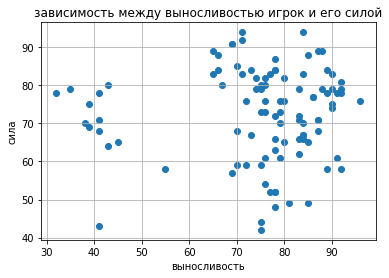

In [54]:
st=np.array(df['Stamina'])
stren=np.array(df['Strength'])
print(st[0:10])
print(stren[0:10])
plt.xlabel('выносливость')
plt.ylabel('сила')
plt.grid(True)
plt.title('зависимость между выносливостью игрок и его силой')
plt.scatter(st[0:100],stren[0:100])


plt.show()

Из графика видно , что игроки как с низкой , так и с высокой выносливостью могут иметь высокий показатель силы,  и наоборот , явной зависимости не наблюдается

12. Зависит ли **стоимость** игрока (Value) от его "**финтов**" (Skill Moves)?

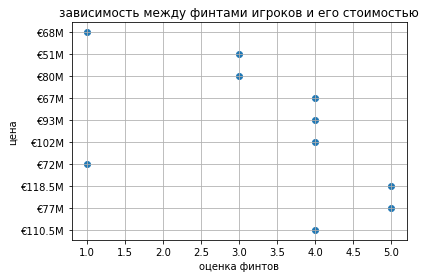

In [55]:
plt.title('зависимость между финтами игроков и его стоимостью')
plt.ylabel('цена')
plt.xlabel('оценка финтов')
a=np.array(df['Value'])
b=np.array(df['Skill Moves'])
plt.grid(True)
plt.scatter(b[0:10],a[0:10])
plt.show()

прямой зависимости не наблюдается, так как игроки с одинаково оцененными финтами могут иметь асболютно разные цены(например,4.0-110м/102M/93M/80M)

13. Покажите распределения основных характеристик игроков: **рост**, **вес**, **возраст** по **позициям** (Position), сделайте выводы

[5.770289855072465, 5.817727695167286, 5.82536945812808, 5.604120734908137, 5.561333333333334, 5.687162162162163, 5.681875, 5.601270270270271, 5.521428571428571, 5.649300626304802, 5.549047619047619, 5.621132420091325, 5.669113924050634, 5.656800573888092, 5.656265984654731, 5.645195729537367, 5.524743589743591, 5.713950617283952, 5.725812236286919, 5.672701612903226, 5.674827586206897, 5.65195915279879, 6.040046296296296, 6.034831271091114, 6.064531722054381, 5.635491866769946]


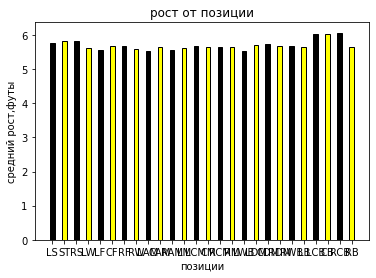

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object
[170.2753623188406, 168.91682156133828, 169.98522167487684, 156.35958005249344, 154.93333333333334, 158.7027027027027, 160.0625, 155.40540540540542, 160.0952380952381, 156.02713987473905, 153.14285714285714, 157.10867579908677, 161.0987341772152, 159.58177905308466, 161.52941176470588, 156.53113879003558, 162.06410256410257, 162.91769547325103, 164.13291139240508, 166.22177419354838, 161.8735632183908, 160.79954614220878, 177.48302469135803, 174.67154105736782, 177.20543806646526, 160.59566227730443]


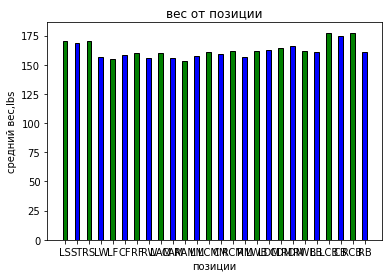

[26.806763285024154, 24.662639405204462, 26.679802955665025, 23.412073490813647, 26.733333333333334, 23.513513513513512, 27.625, 23.59189189189189, 29.333333333333332, 24.580375782881003, 28.714285714285715, 24.493150684931507, 26.063291139240505, 23.48134863701578, 26.171355498721226, 24.40747330960854, 25.384615384615383, 26.876543209876544, 25.235232067510548, 27.004032258064516, 24.367816091954023, 25.085476550680788, 27.05246913580247, 24.818335208098986, 26.983383685800604, 25.28892331525949]


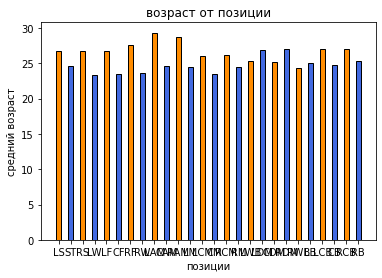

In [78]:
a=[]
all=[]

height=df['Height'].fillna('0')
positions=['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
           'RWB','LB','LCB','CB','RCB','RB']
for ch in positions:
    for i in range(len(df['Position'])):
        if df['Position'][i] == ch:
            a.append(height[i])
    for k in range(len(a)):
        a[k]=float(a[k].replace("'",'.'))
    b=np.array(a)
    all.append(np.mean(b))
    a.clear()

print(all)
plt.xlabel('позиции')
plt.ylabel('средний рост,футы')
plt.title('рост от позиции')
plt.bar(x=positions,height=all,color=["black","yellow"],edgecolor="black",width=0.4)
plt.show()
a=[]
all=[]

weight=df['Weight'].fillna('0')
positions=['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
           'RWB','LB','LCB','CB','RCB','RB']
print(weight)
for ch in positions:
    for i in range(len(df['Position'])):
        if df['Position'][i] == ch:
            a.append(weight[i])
    for k in range(len(a)):
        a[k]=float(a[k].replace("lbs",''))
    b=np.array(a)
    all.append(np.mean(b))
    a.clear()

print(all)
plt.xlabel('позиции')
plt.ylabel('средний вес,lbs')
plt.title('вес от позиции')
plt.bar(x=positions,height=all,color=["green","blue"],edgecolor="black",width=0.4)
plt.show()

a=[]
all=[]

age=df['Age'].fillna('0')
positions=['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
           'RWB','LB','LCB','CB','RCB','RB']

for ch in positions:
    for i in range(len(df['Position'])):
        if df['Position'][i] == ch:
            a.append(age[i])
    b=np.array(a)
    all.append(np.mean(b))
    a.clear()

print(all)
plt.xlabel('позиции')
plt.ylabel('средний возраст')
plt.title('возраст от позиции')
plt.bar(x=positions,height=all,color=["darkorange","royalblue"],edgecolor="black",width=0.4)
plt.show()

14. Есть ли зависимость **скорости** (SprintSpeed) от **веса** и **роста**? От **национальности**?

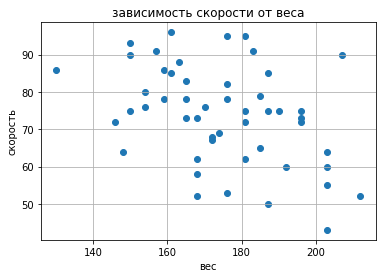

In [57]:
sp=np.array(df['SprintSpeed'])
wg=np.array(df['Weight'].fillna('0'))
wg2=[]
for w in wg:
    wg2.append(int(w.replace('lbs','')))
wg2=np.array(wg2)
plt.title('зависимость скорости от веса')
plt.xlabel('вес')
plt.ylabel('скорость')
plt.scatter(wg2[0:50],sp[0:50])
plt.grid(True)




plt.show()

при увеличении веса уменьшается кол-во игроков имеющих высокую скорость

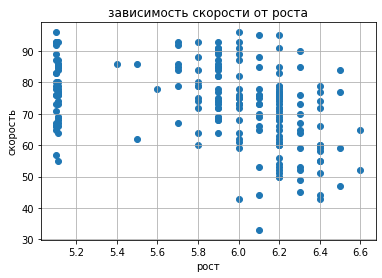

In [58]:
sp=np.array(df['SprintSpeed'])
hg=np.array(df['Height'].fillna('0'))

hg2=[]
for w in hg:
    hg2.append(float(w.replace("'",'.')))
hg2=np.array(hg2)
plt.title('зависимость скорости от роста')
plt.xlabel('рост')
plt.ylabel('скорость')
plt.scatter(hg2[0:200],sp[0:200])
plt.grid(True)




plt.show()

зависимость от роста наблюдается , концентрация игроков с ростом менее 5.25 в высокой скорости наиболее плотная , нежели такая же концентрация у игроков с ростом больше 6.75

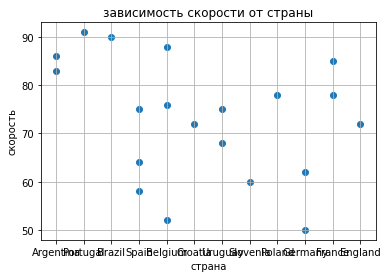

In [59]:

sp=np.array(df['SprintSpeed'])
nt=np.array(df['Nationality'].fillna('0'))

hg2=[]
for w in nt:
    hg2.append((w))
hg2=np.array(hg2)
plt.title('зависимость скорости от страны')
plt.xlabel('страна')
plt.ylabel('скорость')
plt.scatter(hg2[0:20],sp[0:20])
plt.grid(True)




plt.show()


скорость от национальности тоже зависит ,так например футболисты из Аргентины гораздо чаще будут иметь скорость 80+, в отличии от футболистов из Словении 

15. Под какими номерами чаще всего играют нападающие? Визуализируйте частотность

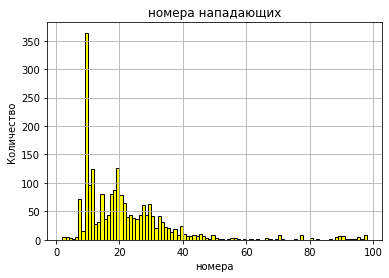

In [60]:
import random
number=np.array(df['Jersey Number'])
pos=np.array(df['Position'])
datnumbers=[]
difcount=[]
for i in range(len(pos)):
    if pos[i]=='ST':
        datnumbers.append(number[i])

datnumbers=np.array(datnumbers)

plt.grid(True)
plt.xlabel('номера')
plt.ylabel('Количество')
plt.title('номера нападающих')

colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green', 'purple', 'cyan', 'yellow', 'lime']
dbins=np.arange(np.amin(datnumbers), np.amax(datnumbers))
plt.hist(datnumbers,edgecolor='black',bins=dbins,color=random.choices(colors))
plt.show()


16. Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


54.75958987595899
57.782949418190455


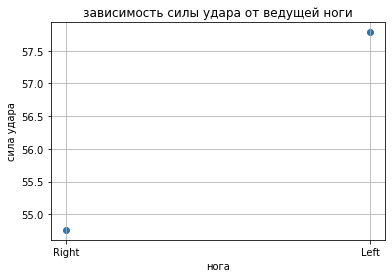

In [61]:
foot=np.array(df['Preferred Foot'])
power=np.array(df['ShotPower'])
r=[]
l=[]
for i in range(len(foot)-1):
    if foot[i]=='Left':
        l.append(power[i])
    if foot[i]=='Right':
        r.append(power[i])
r=np.array(r)
l=np.array(l)

plt.grid(True)
plt.xlabel('нога')
plt.ylabel('сила удара')
plt.title('зависимость силы удара от ведущей ноги')

colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green', 'purple', 'cyan', 'yellow', 'lime']
plt.scatter(['Right','Left'],[np.mean(r),np.mean(l)])
print(np.mean(r))
print(np.mean(l))
plt.show()

от ведущей ноги зависит не очень сильно

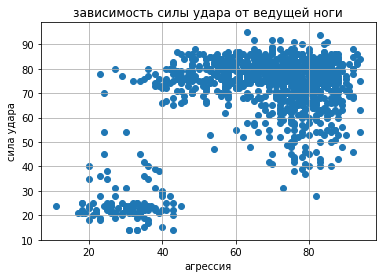

In [62]:
agr=np.array(df['Aggression'].fillna(0))
power=np.array(df['ShotPower'].fillna(0))


plt.grid(True)
plt.xlabel('агрессия')
plt.ylabel('сила удара')
plt.title('зависимость силы удара от ведущей ноги')

colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green', 'purple', 'cyan', 'yellow', 'lime']
plt.scatter(agr[0:1000],power[0:1000])
plt.show()


игроки с агрессией 40+ имеют как правило большую силу удара

17. Найдите суммарную стоимость игроков в каждом клубе
18. Визуализируйте соотношение сумарной стоимости топ 10 клубов

[{'FC Barcelona': 852600000}, {'Juventus': 704475000}, {'Paris Saint-Germain': 625325000}, {'Manchester United': 588850000}, {'Manchester City': 786555000}, {'Chelsea': 606815000}, {'Real Madrid': 874425000}, {'Atlético Madrid': 644525000}, {'FC Bayern München': 679025000}, {'Tottenham Hotspur': 618450000}, {'Liverpool': 585055000}, {'Napoli': 514000000}, {'Arsenal': 435990000}, {'Milan': 416999999}, {'Inter': 466485000}, {'Lazio': 352135000}, {'Borussia Dortmund': 420245000}, {'Vissel Kobe': 37455000}, {'Olympique Lyonnais': 310930000}, {'Roma': 335450000}, {'Valencia CF': 394225000}, {'Guangzhou Evergrande Taobao FC': 115015000}, {'FC Porto': 335599999}, {'FC Schalke 04': 249315000}, {'Beşiktaş JK': 172950000}, {'LA Galaxy': 61450000}, {'Sporting CP': 299225000}, {'Real Betis': 297915000}, {'Olympique de Marseille': 258800000}, {'RC Celta': 225600000}, {'Bayer 04 Leverkusen': 317685000}, {'Real Sociedad': 231085000}, {'Villarreal CF': 275699999}, {'Sevilla FC': 309850000}, {'SL Benfi

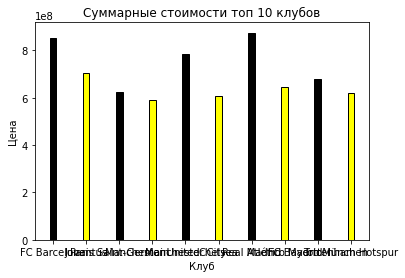

In [67]:
club=np.array(df['Club'].fillna('0'))
realclubs=[]
for x in club:
    if x not in realclubs:
        realclubs.append(x)
c=[]
realvalues=[]
a=[]
b=[]
for team in realclubs:
   for i in range(len(club)):
       if club[i]==team:
           a.append(i)

   for j in range(len(a)):
        b.append(df['Value'][a[j]])
   c=b.copy()
   for k in range(len(c)):
        if 'M' in c[k] :
            c[k]=int(float(c[k].replace('M','').replace('€',''))*1000000)
        else:

            c[k] = int(float(c[k].replace('K', '').replace('€', '')) * 1000)
   avgval=np.array(c)
   avgval1=np.sum(c)

   realvalues.append({team:avgval1})


   b.clear()
   a.clear()

print(realvalues)
costs=[]
for i in range(len(realclubs)):
    costs.append(realvalues[i][realclubs[i]])



plt.bar(x=realclubs[0:10],height=costs[0:10],color=['black','Yellow'],edgecolor='black',width=0.2)
plt.title('Суммарные стоимости топ 10 клубов')
plt.xlabel('Клуб')
plt.ylabel('Цена')
plt.show()

19. Есть ли зависимость между продолжительностью контракта игрока и его стоимостью? 

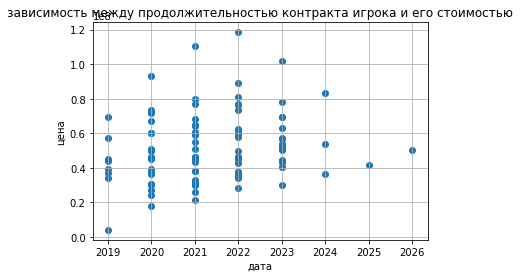

In [66]:
c=np.array(df["Value"].fillna('0'))
con=np.array(df["Contract Valid Until"].fillna('0'))
for k in range(len(c)):
        if 'M' in c[k] :
            c[k]=int(float(c[k].replace('M','').replace('€',''))*1000000)
        else:

            c[k] = int(float(c[k].replace('K', '').replace('€', '')) * 1000)
for k in range(len(con)):
        con[k]=con[k][len(con[k])-4:len(con[k])]


con=con.astype(int)
plt.grid()
plt.xlabel('дата')
plt.ylabel('цена')
plt.title('зависимость между продолжительностью контракта игрока и его стоимостью')
plt.scatter(con[0:100],c[0:100])
plt.show()

какой-то явной зависимости нет

20. В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? Визуализируйте зависимость

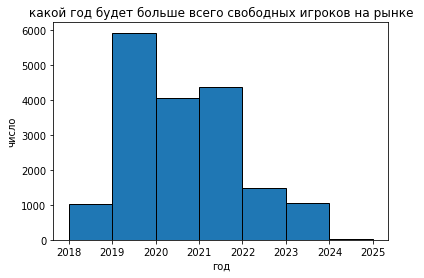

In [68]:
plt.xlabel('год')
plt.ylabel('число')
plt.title(' какой год будет больше всего свободных игроков на рынке ')
plt.hist(con[con!=0],bins=np.arange(np.min(con[con!=0]),np.max(con[con!=0])),edgecolor="black")
plt.show()


21. Есть ли зависмость **потенциала** (Potential) игрока от **возраста**?
22. Всегда ли молодые игроки обладают большим потенциалом?

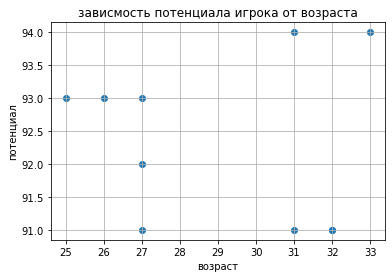

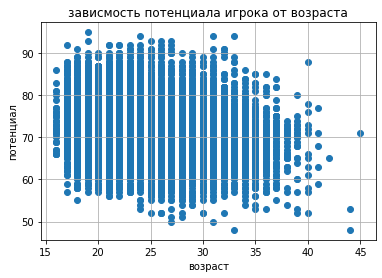

In [69]:
pot=np.array(df['Potential'])
age=np.array(df['Age'])
plt.scatter(age[0:10],pot[0:10])




plt.grid()
plt.xlabel('возраст')
plt.ylabel('потенциал')
plt.title('зависмость потенциала игрока от возраста')
plt.show()
plt.scatter(age,pot)




plt.grid()
plt.xlabel('возраст')
plt.ylabel('потенциал')
plt.title('зависмость потенциала игрока от возраста')
plt.show()


у игроков молодых куда более вероятно найти человека с потенциалом 90+,
но на первом графике видно, что не всегда молодые имеют потенциал больший , чем игроки в возрасте

23. Есть ли зависимость **рейтинга** игрока (Overall) от **возраста**?
24. Когда у игроков "пик" карьеры?
25. Игроков какого возраста больше всего с рейтингом 90+?

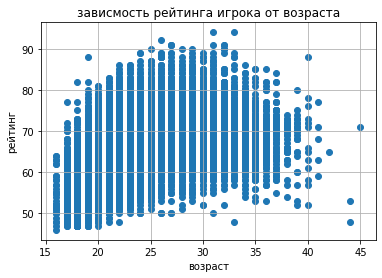

In [71]:
pot=np.array(df['Overall'])
age=np.array(df['Age'])
plt.scatter(age,pot)


plt.grid()
plt.xlabel('возраст')
plt.ylabel('рейтинг')
plt.title('зависмость рейтинга игрока от возраста')
plt.show()


самый высокий рейтинг наблюдается в возрасте от 30 до 35, что говорит о пике карьеры.Зависмость рейтинга от возраста есть , игроки 40+ лет резко идут на спад, в отличе от молодых, которые только увеличивают рейтинг

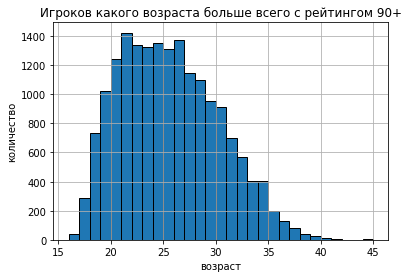

In [74]:
ovr=np.array(df['Overall'])
age=[]
for i in range(len(ovr)):
    if i >=90:
        age.append(df["Age"].fillna(0)[i])
realage=[]
for i in age:
    if i not in realage:
        realage.append(i)
realage.sort()

plt.hist(age,bins=realage,edgecolor="black")

plt.grid()
plt.xlabel('возраст')
plt.ylabel('количество')
plt.title('Игроков какого возраста больше всего с рейтингом 90+')
plt.show()

больше всего 21 летних игроков

26. Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше 


средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


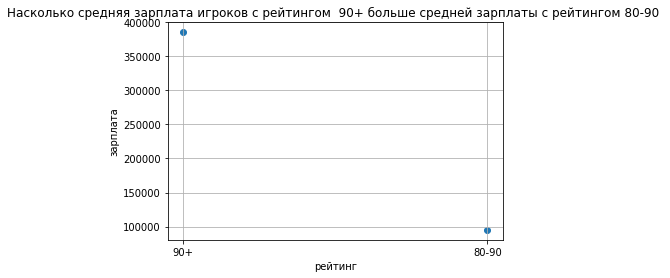

290532.9424902289


In [75]:
ovr=np.array(df['Overall'])
agen=[]
agee=[]
wage=df['Wage']

for k in range(len(wage)):
    wage[k]=int(wage[k].replace('K','').replace('€',''))*1000

for i in range(len(ovr)):
    if ovr[i]>90 :
       agen.append(wage[i])
    elif ovr[i]<90 and ovr[i]>80:
        agee.append(wage[i])
agen=np.array(agen)
agee=np.array(agee)
plt.scatter(['90+','80-90'],[np.mean(agen),np.mean(agee)])
plt.grid()
plt.xlabel('рейтинг')
plt.ylabel('зарплата')
plt.title('Насколько средняя зарплата игроков с рейтингом  90+ больше средней зарплаты с рейтингом 80-90 ')
plt.show()
print(np.mean(agen)-np.mean(agee))